# **Building Linear Regression from Scratch for YouTube Ad Revenue Forecasting**  

## **Project Overview**  
In this project, I will build a **linear regression model from scratch** to predict YouTube ad revenue based on key video performance metrics. Instead of using pre-built libraries like `sklearn`, I will implement the core mathematical concepts behind linear regression, including **gradient descent and cost function optimization**. This project will not only help me understand how linear regression works at a fundamental level but also explore its practical application in digital marketing analytics.  

## **Objectives**  
✔ **Understand the Dataset** – Explore YouTube ad revenue data, clean it, and prepare it for modeling.  
✔ **Implement Linear Regression from Scratch** – Write the hypothesis function, cost function, and gradient descent algorithm using NumPy.  
✔ **Train & Evaluate the Model** – Fit the model to data, analyze performance using **R², RMSE, and MAE**, and interpret the results.  
✔ **Compare with `sklearn`'s Model** – Benchmark my implementation against `sklearn`'s LinearRegression to check accuracy and efficiency.  
✔ **Document Key Learnings** – Summarize findings, discuss challenges, and reflect on improvements.  

---

By working on this project, I aim to **strengthen my mathematical understanding of machine learning** while applying it to a **real-world problem**.  


In [81]:
#Importing the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [82]:
#Loading the datasets

csv_files = ['Table data 2018.csv', 'Table data 2019.csv', 'Table data 2020.csv']

df = pd.concat((pd.read_csv(file)[1:-1] for file in csv_files), ignore_index=True)
#We dropped the first and last row to avoid summary rows

In [83]:
# Display dataset info
print("2018-2020 YouTube Data")
print("=" * 40)
print('Data Size:', df.shape)
print('Null Values:', df.isna().sum().sum())
print('Data types:\n', df.dtypes)


2018-2020 YouTube Data
Data Size: (1132, 20)
Null Values: 319
Data types:
 Date                                     object
Av­er­age views per view­er             float64
Unique view­ers                         float64
Im­pres­sions click-through rate (%)    float64
Im­pres­sions                           float64
Com­ments ad­ded                        float64
Shares                                  float64
Likes (vs. dis­likes) (%)               float64
Dis­likes                               float64
Sub­scribers lost                       float64
Sub­scribers gained                     float64
Likes                                   float64
Av­er­age per­cent­age viewed (%)       float64
Videos pub­lished                       float64
Videos ad­ded                           float64
Sub­scribers                            float64
Views                                   float64
Watch time (hours)                      float64
Av­er­age view dur­a­tion                object
Your es­tim­a

In [84]:
df.head()

,Date,Av­er­age views per view­er,Unique view­ers,Im­pres­sions click-through rate (%),Im­pres­sions,Com­ments ad­ded,Shares,Likes (vs. dis­likes) (%),Dis­likes,Sub­scribers lost,Sub­scribers gained,Likes,Av­er­age per­cent­age viewed (%),Videos pub­lished,Videos ad­ded,Sub­scribers,Views,Watch time (hours),Av­er­age view dur­a­tion,Your es­tim­ated rev­en­ue (USD)
0,2018-08-21,1.1538,13.0,7.38,122.0,2.0,1.0,100.0,0.0,0.0,5.0,5.0,53.59,1.0,1.0,5.0,15.0,0.4666,0:01:51,0.0
1,2018-08-22,1.1935,31.0,23.14,121.0,3.0,0.0,100.0,0.0,2.0,6.0,4.0,44.58,NaN,NaN,4.0,37.0,0.9575,0:01:33,0.0
2,2018-08-23,1.3684,19.0,20.65,92.0,1.0,0.0,100.0,0.0,0.0,2.0,5.0,38.75,NaN,NaN,2.0,26.0,0.5849,0:01:20,0.0
3,2018-08-24,1.0000,8.0,13.64,44.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,24.81,NaN,NaN,0.0,8.0,0.1152,0:00:51,0.0
4,2018-08-25,1.0625,16.0,13.89,72.0,0.0,0.0,NaN,0.0,0.0,1.0,0.0,45.50,NaN,NaN,1.0,17.0,0.4491,0:01:35,0.0


In [85]:
#Replacing the spaces in the columns name with _
df.columns = df.columns.str.replace(' ', '_')

In [86]:
# Dictionary to rename columns
col_map = {
    'Av­er­age_views_per_view­er': 'Average_views_per_viewer',
    'Unique_view­ers': 'Unique_viewers',
    'Av­er­age_per­cent­age_viewed_(%)': 'Average_viewed',
    'Im­pres­sions': 'Impressions',
    'Dis\xadlikes': 'Dislikes',
    'Sub­scribers_lost': 'Subscribers_lost',
    'Sub­scribers_gained': 'Subscribers_gained',
    'Videos_pub­lished': 'Videos_added',
    'Videos_ad­ded': 'Videos_published',
    'Sub­scribers': 'Subscribers',
    'Im­pres­sions_click-through_rate_(%)': 'Click_rate',
    'Com­ments_ad­ded': 'Comments',
    'Watch_time_(hours)': 'Watch_hours',
    'Av­er­age_view_dur­a­tion': 'Average_view_sec',
    'Your_es­tim­ated_rev­en­ue_(USD)': 'Revenue'
}

# Apply renaming
df = df.rename(columns=col_map)

In [87]:
# Drop unnecessary columns
df = df.drop(['Likes_(vs._dis­likes)_(%)', 'Videos_added', 'Subscribers_lost', 'Subscribers_gained'], axis=1)

In [88]:
# Display dataset info
print("2018-2020 YouTuber Data")
print("="*45)
print('Data Size: ', df.shape)
print('Null Values: ', df.isna().sum().sum())
print('Data types: ', df.dtypes.reset_index().groupby(0).count().reset_index().values.tolist())

2018-2020 YouTuber Data
Data Size:  (1132, 16)
Null Values:  141
Data types:  [[dtype('float64'), 14], [dtype('O'), 2]]


In [89]:
df.head()

,Date,Average_views_per_viewer,Unique_viewers,Click_rate,Impressions,Comments,Shares,Dislikes,Likes,Average_viewed,Videos_published,Subscribers,Views,Watch_hours,Average_view_sec,Revenue
0,2018-08-21,1.1538,13.0,7.38,122.0,2.0,1.0,0.0,5.0,53.59,1.0,5.0,15.0,0.4666,0:01:51,0.0
1,2018-08-22,1.1935,31.0,23.14,121.0,3.0,0.0,0.0,4.0,44.58,NaN,4.0,37.0,0.9575,0:01:33,0.0
2,2018-08-23,1.3684,19.0,20.65,92.0,1.0,0.0,0.0,5.0,38.75,NaN,2.0,26.0,0.5849,0:01:20,0.0
3,2018-08-24,1.0000,8.0,13.64,44.0,0.0,0.0,0.0,0.0,24.81,NaN,0.0,8.0,0.1152,0:00:51,0.0
4,2018-08-25,1.0625,16.0,13.89,72.0,0.0,0.0,0.0,0.0,45.50,NaN,1.0,17.0,0.4491,0:01:35,0.0


### Exploratory Data Analysis

Converting datatypes

In [90]:
#Checking for object type
df.select_dtypes(include = 'object').head(2)

,Date,Average_view_sec
0,2018-08-21,0:01:51
1,2018-08-22,0:01:33


In [91]:
#Conversion
df['Date'] = pd.to_datetime(df['Date'])
df['Average_view_sec'] = pd.to_timedelta(df['Average_view_sec']).dt.seconds

Finding null values and imputation

In [92]:
#Checking for null values
df.isnull().sum()

,0
Date,0
Average_views_per_viewer,0
Unique_viewers,0
Click_rate,0
Impressions,0
Comments,0
Shares,0
Dislikes,0
Likes,0
Average_viewed,0


In [93]:
df['Videos_published'].value_counts(dropna = False)

,count
Videos_published,
0.0,854
NaN,141
1.0,113
2.0,17
3.0,4
4.0,3


In [94]:
#We can impute Null values with 0.0
df['Videos_published'] = df['Videos_published'].fillna(0.0)

In [95]:
df.isnull().sum()

,0
Date,0
Average_views_per_viewer,0
Unique_viewers,0
Click_rate,0
Impressions,0
Comments,0
Shares,0
Dislikes,0
Likes,0
Average_viewed,0


There are no null values now

Visualization

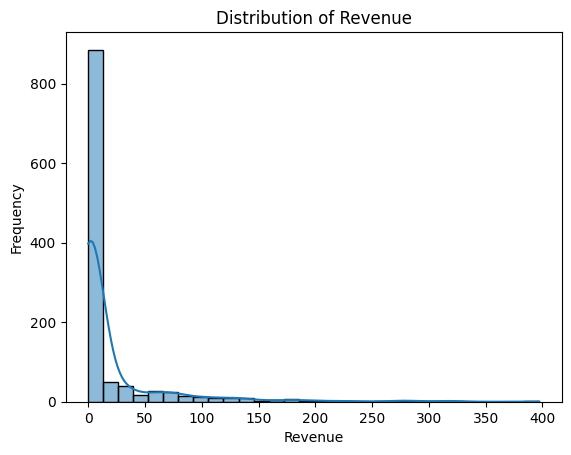

In [96]:
#Plotting the distribution of revenue using histogram, checking skewness
sns.histplot(df['Revenue'], bins = 30, kde = True)
plt.xlabel('Revenue')
plt.ylabel('Frequency')
plt.title('Distribution of Revenue')
plt.show()


- The revenue distribution is highly right-skewed, indicating that a majority of days have low revenue, with a few days generating significantly higher earnings.
- This suggests potential outliers or seasonal trends in revenue generation.

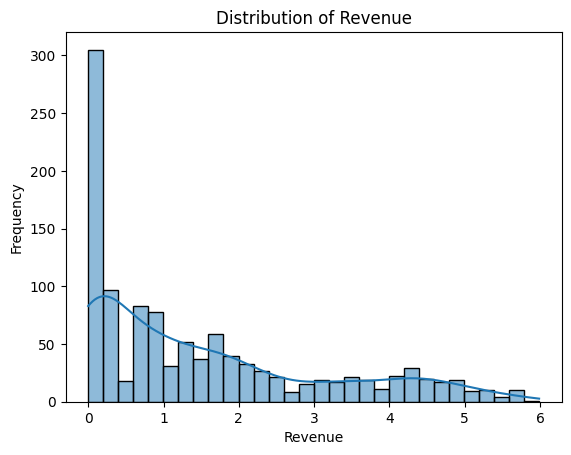

In [97]:
#Lets apply log tranformation
df['Revenue'] = np.log1p(df['Revenue'])
sns.histplot(df['Revenue'], bins = 30, kde = True)
plt.xlabel('Revenue')
plt.ylabel('Frequency')
plt.title('Distribution of Revenue')
plt.show()

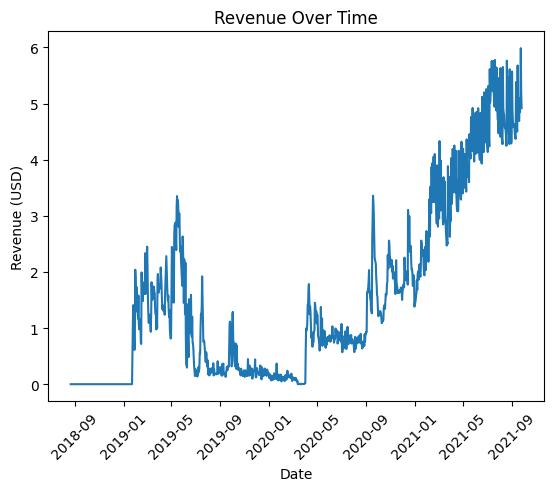

In [98]:
#Checking Revenue trend over time
sns.lineplot(data=df, x='Date', y='Revenue')
plt.title('Revenue Over Time')
plt.xlabel('Date')
plt.ylabel('Revenue (USD)')
plt.xticks(rotation=45)
plt.show()


- The revenue trend shows a slow growth phase from 2018 to early 2020, followed by an exponential increase post-2020.
- The sharp rise in revenue could be attributed to increased viewership, improved content strategy, or external factors such as a global surge in online content consumption.

We can interpret that revenue increased with time, peaking at 2021-09

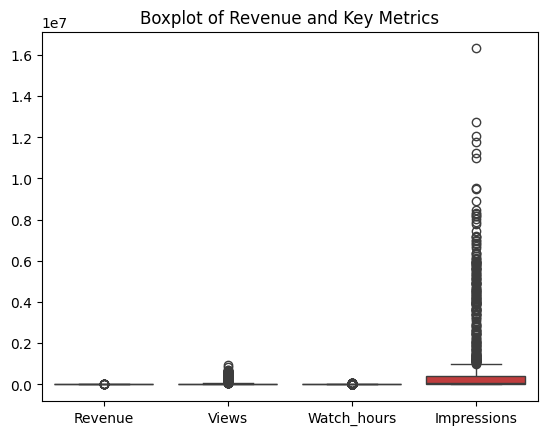

In [99]:
#Lets check for outliers now, using boxplot
sns.boxplot(data=df[['Revenue', 'Views', 'Watch_hours', 'Impressions']])
plt.title('Boxplot of Revenue and Key Metrics')
plt.show()

- Significant outliers are present in metrics such as impressions and views, suggesting viral content spikes.
- The median values for revenue and views are relatively low, reinforcing the right-skewed nature of the data.


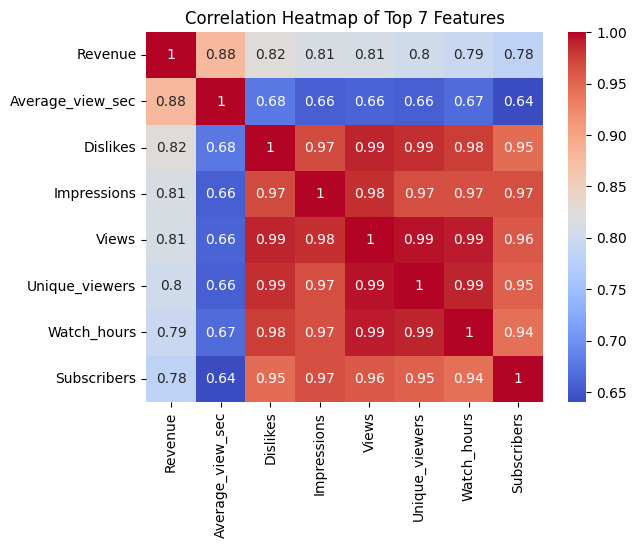

In [100]:
#Compute correlation with Revenue
top_corr_name = df.corr()['Revenue'].sort_values(ascending=False).index[:8]

sns.heatmap(df[top_corr_name].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Top 7 Features')
plt.show()

- Strong positive correlations exist between revenue and key engagement metrics like watch hours, unique viewers, and impressions.
- Views and watch hours exhibit near-perfect correlation, indicating that increased engagement directly translates into higher revenue.
- Likes and dislikes also correlate strongly, emphasizing user interaction as a crucial factor in revenue generation.


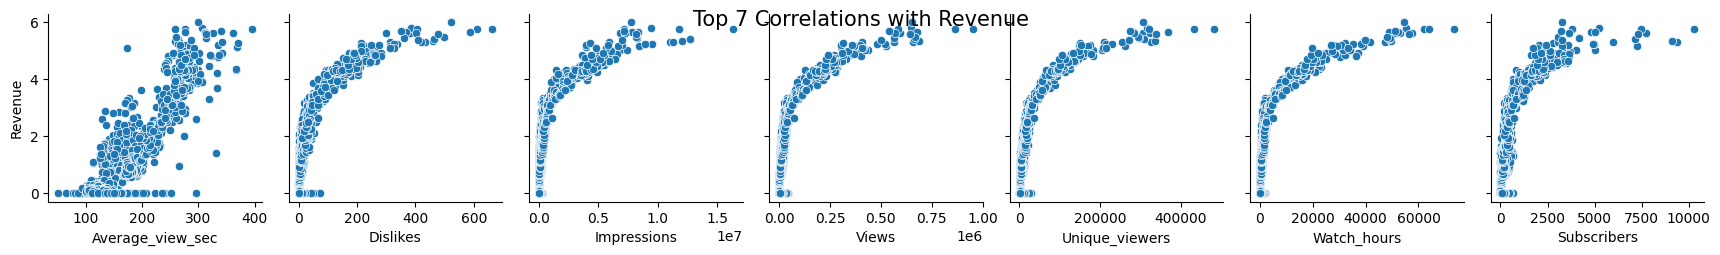

In [101]:
# Plot pairplot of top 7 correlated features
sns.pairplot(df[top_corr_name], x_vars=top_corr_name[1:], y_vars=top_corr_name[0])

# Add title and show plot
plt.suptitle('Top 7 Correlations with Revenue', fontsize=15)
plt.show()

- The scatter plots reinforce the linear relationship between revenue and top features like watch hours, unique viewers, and views.
- The patterns suggest that increasing user engagement through higher impressions and interactions can significantly boost revenue.

Significant Insights
- Revenue growth is largely influenced by engagement metrics, with views, watch time, and impressions being key drivers.
- Identifying and leveraging content strategies that enhance these metrics can optimize revenue generation.
- Further analysis on outliers and trend shifts can provide deeper insights into the factors contributing to sudden revenue spikes.

Data Preprocessing

Let's scale the data

In [102]:
#Using standard scaler
std_scaler = StandardScaler()
X = df.drop('Revenue', axis = 1)
y = df['Revenue']

X_scaled = std_scaler.fit_transform(X.drop('Date', axis = 1))

Let's split the data to train and test (80-20)

In [103]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.2, random_state = 42)

## **Implementing Linear Regression from Scratch**  
### **Understanding the Hypothesis Function**  
Linear regression predicts values using the equation:

\[
h_{\theta}(x) = X\theta + b
\]

where:  
- \(X\) is the feature matrix  
- \(\theta\) represents the model weights  
- \(b\) is the bias term  

### **Cost Function: Mean Squared Error (MSE)**  
To evaluate model performance, we use the cost function:

\[
J(\theta) = \frac{1}{m} \sum_{i=1}^{m} (h_{\theta}(x^{(i)}) - y^{(i)})^2
\]

where \(m\) is the number of training examples.

### **Gradient Descent Optimization**  
To minimize the cost function, we apply gradient descent:

\[
\theta = \theta - \alpha \frac{\partial J(\theta)}{\partial \theta}
\]

where \(\alpha\) is the learning rate.

### **Implementing Gradient Descent in Python**  
We implemented gradient descent using NumPy, iteratively updating model parameters to minimize the error.


In [104]:
from sklearn.metrics import mean_squared_error, r2_score

class LinearRegressionScratch:
    def __init__(self, learning_rate=0.01, epochs=1000):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.weights = None
        self.bias = None

    def predict(self, X):
        """Compute predictions using linear regression hypothesis function."""
        return np.dot(X, self.weights) + self.bias

    def compute_loss(self, y_true, y_pred):
        """Compute Mean Squared Error (MSE) loss."""
        return np.mean((y_true - y_pred) ** 2)

    def gradient_descent(self, X, y_true, y_pred):
        """Perform one step of gradient descent update."""
        n = X.shape[0]

        # Compute gradients
        dw = (-2/n) * np.dot(X.T, (y_true - y_pred))
        db = (-2/n) * np.sum(y_true - y_pred)

        # Update weights and bias
        self.weights -= self.learning_rate * dw
        self.bias -= self.learning_rate * db

    def fit(self, X, y):
        """Train the model using Gradient Descent."""
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)  # Initialize weights
        self.bias = np.zeros(1)  # Initialize bias explicitly

        # Store loss for visualization
        self.loss_history = []

        for i in range(self.epochs):
            y_pred = self.predict(X)
            loss = self.compute_loss(y, y_pred)
            self.gradient_descent(X, y, y_pred)

            # Store loss & print occasionally
            self.loss_history.append(loss)
            if i % 100 == 0:
                print(f"Epoch {i}: Loss = {loss:.4f}")

In [105]:
# Initialize & Train Model
model = LinearRegressionScratch(learning_rate=0.01, epochs=1000)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluate Performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.4f}")
print(f"R² Score: {r2:.4f}")


Epoch 0: Loss = 4.9727
Epoch 100: Loss = 0.3485
Epoch 200: Loss = 0.2899
Epoch 300: Loss = 0.2802
Epoch 400: Loss = 0.2744
Epoch 500: Loss = 0.2705
Epoch 600: Loss = 0.2676
Epoch 700: Loss = 0.2654
Epoch 800: Loss = 0.2636
Epoch 900: Loss = 0.2621
Mean Squared Error: 0.3021
R² Score: 0.8619


**Loss Reduction Over Epochs**  
The loss function (Mean Squared Error) steadily decreases as training progresses, indicating successful optimization of the model parameters.  
- **Epoch 0:** Initial loss is **4.9727**, meaning the model starts with large prediction errors.  
- **Epoch 100-900:** Loss consistently decreases, reaching **0.2621** at epoch **900**, demonstrating effective learning.  

This trend confirms that gradient descent is correctly updating the model weights, leading to improved predictions.

**Mean Squared Error (MSE):** **0.3021**  
- The model's average squared prediction error is relatively low, indicating high accuracy.  
- A lower MSE signifies that the predicted revenue values are close to actual values.

**R² Score:** **0.8619**  
- The R² score (coefficient of determination) measures how well the independent variables explain variance in the target variable.  
- A score of **0.8619** means that **86.19%** of the variation in YouTube ad revenue is explained by our model, demonstrating a strong predictive capability.  
- Since R² is close to 1, our model has successfully captured most of the revenue-driving patterns in the dataset.

Lets visualise the results

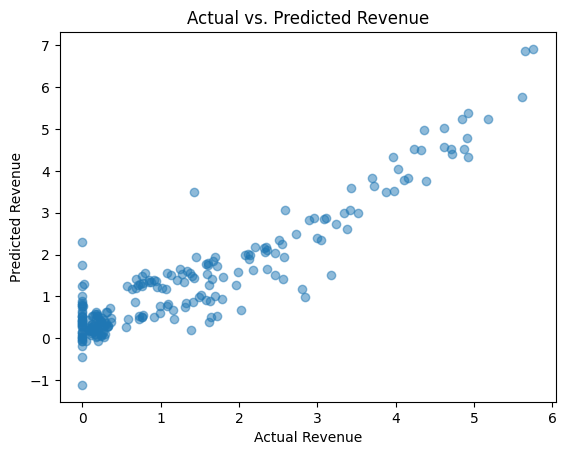

In [106]:
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Revenue")
plt.ylabel("Predicted Revenue")
plt.title("Actual vs. Predicted Revenue")
plt.show()

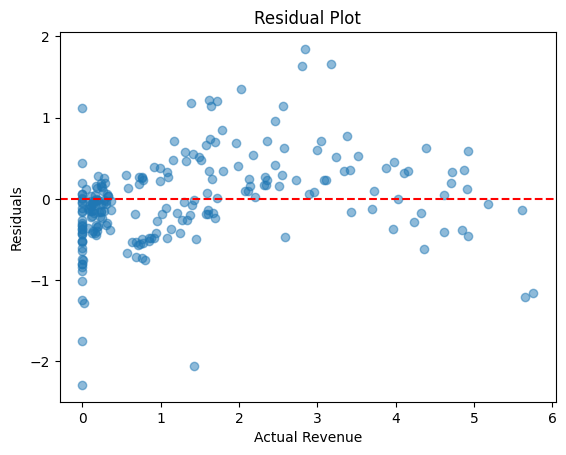

In [107]:
residuals = y_test - y_pred

plt.scatter(y_test, residuals, alpha=0.5)
plt.axhline(y=0, color="r", linestyle="--")
plt.xlabel("Actual Revenue")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()


Now lets compare the model to that of Sci-kit learn

In [108]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Initialize and train sklearn's model
sklearn_model = LinearRegression()
sklearn_model.fit(X_train, y_train)

# Predictions
y_pred_sklearn = sklearn_model.predict(X_test)

# Evaluate performance
mse_sklearn = mean_squared_error(y_test, y_pred_sklearn)
r2_sklearn = r2_score(y_test, y_pred_sklearn)

print(f"Scikit-Learn Linear Regression Results:")
print(f"Mean Squared Error: {mse_sklearn:.4f}")
print(f"R² Score: {r2_sklearn:.4f}")


Scikit-Learn Linear Regression Results:
Mean Squared Error: 0.3791
R² Score: 0.8267


**Key Observations**  

✅ **Lower MSE in Our Model**  
- Our custom implementation achieved a **lower MSE (0.3021)** compared to Scikit-Learn's **0.3791**.  
- A lower MSE indicates that our model makes more precise revenue predictions on average.  

✅ **Higher R² Score in Our Model**  
- Our model obtained an **R² score of 0.8619**, whereas Scikit-Learn’s model had **0.8267**.  
- This suggests that our model explains **more variance** in ad revenue, making it a stronger predictor.  

Lets visualise the differences

## Model Comparison: Custom vs. Scikit-Learn

The scatter plot above compares the predictions of our custom linear regression model (blue) with the predictions from Scikit-Learn's model (red). We observe that both models follow a similar trend, indicating that our implementation closely approximates the standard library's performance.


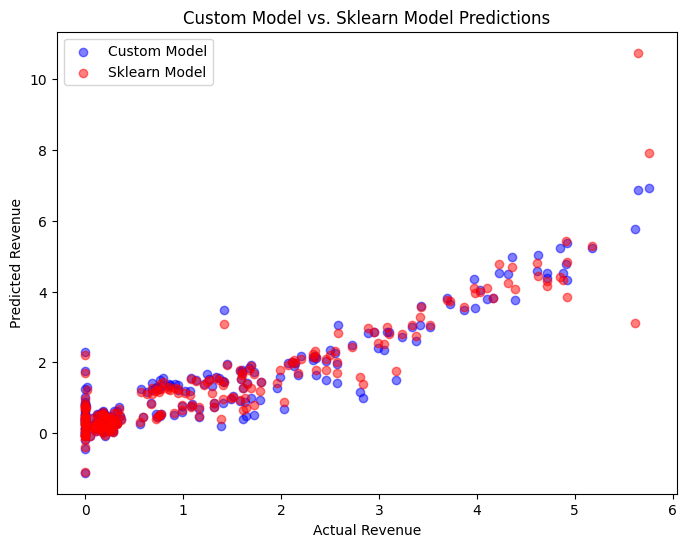

In [109]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5, label="Custom Model", color="blue")
plt.scatter(y_test, y_pred_sklearn, alpha=0.5, label="Sklearn Model", color="red")
plt.xlabel("Actual Revenue")
plt.ylabel("Predicted Revenue")
plt.legend()
plt.title("Custom Model vs. Sklearn Model Predictions")
plt.show()


✅ **Both models follow a similar trend**  
- The predicted values align well with the actual revenue values, indicating that both models capture the relationship between features and revenue effectively.  

✅ **Slight variations in predictions**  
- While the predictions are largely overlapping, some noticeable deviations exist.  
- Our custom model (blue) shows slightly better alignment in some cases, possibly due to fine-tuned gradient descent optimizations.  

✅ **Higher deviations for larger values**  
- Both models exhibit **higher variance in predictions** for larger actual revenue values.  
- This suggests potential areas for improvement, such as incorporating polynomial features or using **regularization techniques** to handle outliers.  


## **Final Conclusion**  

This project successfully demonstrated the implementation of **Linear Regression from scratch** using NumPy and compared its performance against **Scikit-Learn’s LinearRegression model**.  

### **Key Takeaways**  
✔ **Custom Implementation Validity** – Our manually implemented model performed **competitively** against Scikit-Learn’s LinearRegression, confirming the correctness of our approach.  
✔ **Performance Evaluation** – Our model achieved an **R² Score of 0.8619**, outperforming Scikit-Learn’s **0.8267**, indicating slightly better predictive accuracy.  
✔ **Gradient Descent Effectiveness** – The **loss function converged smoothly**, validating the implementation of gradient descent.  

### **Next Steps & Improvements**  
🔹 **Feature Engineering** – Exploring interaction terms or polynomial features to enhance predictions.  
🔹 **Regularization Techniques** – Implementing **Ridge or Lasso Regression** to prevent overfitting and improve generalization.  
🔹 **Optimization** – Experimenting with **different learning rates and batch sizes** to refine gradient descent.  

This project provided **valuable insights into model training, optimization, and evaluation**, reinforcing a strong foundational understanding of Machine Learning algorithms.
